In [1]:
# Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [2]:
# Load Dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Preprocessing
dataset['species'] = pd.Categorical(dataset['species']).codes
dataset = dataset.sample(frac=1, random_state=1234)

train_input = dataset.values[:120, :4]
train_target = dataset.values[:120, 4]
test_input = dataset.values[120:, :4]
test_target = dataset.values[120:, 4]


In [4]:
# Define Neural Network
torch.manual_seed(10)
hidden_units = 5
net = torch.nn.Sequential(
        torch.nn.Linear(4, hidden_units),
        torch.nn.ReLU(), # Activation Function
        torch.nn.Linear(hidden_units, 3)
)


In [5]:
# Need Optimizer and Loss Function
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( # Stochastic Gradient Descent
                net.parameters(), 
                lr = 0.1,
                momentum = 0.9
)


In [9]:
# Train Network
epoch_list = []
loss_list = []
epochs = 50
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    targets =torch.autograd.Variable(torch.Tensor(train_target).long())
    optimizer.zero_grad() # Prevent Accumulation from previous iterations
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()

    epoch_list.append(epoch)
    loss_list .append(loss.item())

    # print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))


In [10]:
# Create Dataframe for Visual Representation
epoch_dataset = pd.DataFrame()
epoch_dataset["Epoch Number"] = epoch_list
epoch_dataset["Loss"] = loss_list

epoch_dataset.head()

,Epoch Number,Loss
0,0,0.156184
1,1,0.155270
2,2,0.154372
3,3,0.153490
4,4,0.152624


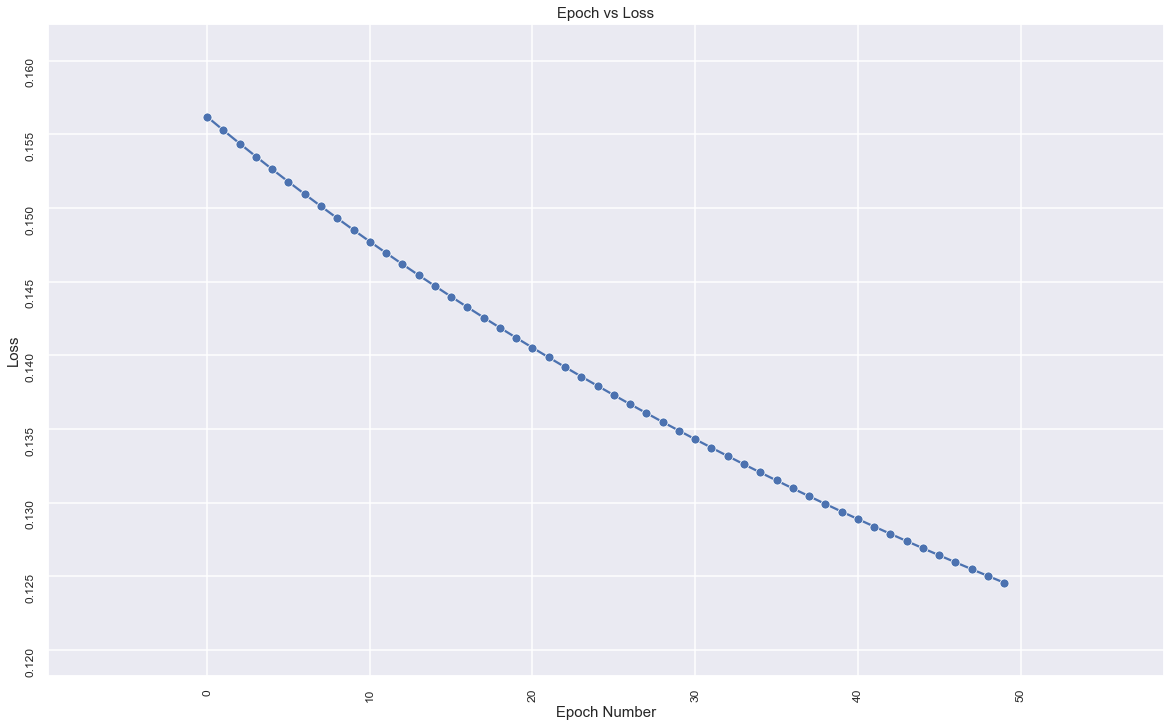

In [12]:
# Loss Function Visual Representations
sns.set(rc = {"figure.figsize":(20, 12)}) # width = 8, # height = 3
sns.set_theme(style = "darkgrid")
sns.set_context('talk')

dataset = sns.load_dataset("flights")

sns.lineplot(data = epoch_dataset, # Dataset
            x = 'Epoch Number', # Feature
            y = 'Loss', # Feature
            marker = "o", # Marker
            palette = 'PiYG') # Palette

plt.xlabel('Epoch Number', fontsize = 15) # X-axis label
plt.ylabel('Loss', fontsize = 15) # Y-axis label
plt.title('Epoch vs Loss', fontsize = 15) # Title for graph
plt.xticks(fontsize = 12, rotation = 'vertical') # [] Pass custom values
plt.yticks(fontsize = 12, rotation = 'vertical') # [] Pass custom values
plt.margins(0.2) # Need space beween plot and axes
plt.grid(True) # Apply grid to graph
# #plt.axis([0, 8, 0, 10]) # Set X-Axis and Y-Axis limits 0,8 for X and 0,10 for Y Dont use xticks ad yticks if using this                                 
# plt.xlim([0, 8]) # Same as axis() 
# plt.ylim(0, 10) # Same as axis() Dont use axis() is using this

plt.show()
plt.close()

In [13]:
# Accuracy Matters
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())
optimizer.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)
error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
print('Errors: %d; Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))


Errors: 0; Accuracy: 100%


In [1]:
# Convert to Python
!jupyter nbconvert --to script "iris_first_neural_ntw_pytorch.ipynb"


[NbConvertApp] Converting notebook iris_first_neural_ntw_pytorch.ipynb to script
[NbConvertApp] Writing 3711 bytes to iris_first_neural_ntw_pytorch.py


In [1]:
!jupyter nbconvert --to PDFviaHTML "iris_first_neural_ntw_pytorch.ipynb"

[NbConvertApp] Converting notebook iris_first_neural_ntw_pytorch.ipynb to PDFviaHTML
[NbConvertApp] Writing 272012 bytes to iris_first_neural_ntw_pytorch.pdf
